In [19]:
import numpy as np
import pandas as pd

In [20]:
def f(x):
    return x * x

In [21]:
n = 10
data = pd.DataFrame({
    "y": np.array(range(n)),
    "x": f(np.array(range(n))),
    # "x2": f(np.array(range(n)))/2,
    "b": 1,
})[["x", "b", "y"]]
data

,x,b,y
0,0,1,0
1,1,1,1
2,4,1,2
3,9,1,3
4,16,1,4
5,25,1,5
6,36,1,6
7,49,1,7
8,64,1,8
9,81,1,9


In [22]:
X = data[["x", "b"]].copy()
y = data[["y"]].copy()
X

,x,b
0,0,1
1,1,1
2,4,1
3,9,1
4,16,1
5,25,1
6,36,1
7,49,1
8,64,1
9,81,1


In [23]:
def F(x):
    return 2/(1 + np.exp(-x)) - 1

In [24]:
def L(y_true, y_pred):
    return (y_true - y_pred)**2

In [25]:
def F_deriv(x):
    return F(x)*(1 - F(x))

In [26]:
W1 = np.random.rand(2,3) * 2 - 1
W2 = np.random.rand(3,2) * 2 - 1
W3 = np.random.rand(2,1) * 2 - 1
x = X.values[2]
y = y.values[2]

In [27]:
x

array([4, 1])

In [28]:
t1 = x @ W1  # первый слой
h1 = F(t1)  # нелинейность первого слоя
t2 = h1 @ W2  # второй слой
h2 = F(t2)  # нелинейность второго слоя
t3 = h2 @ W3  # третий слой
z = t3  # ответ
E = np.sum(L(y, z))  # ошибка выхода нейронной сети

z, y, E

(array([0.30365242]), array([2]), 2.877595117343895)

In [29]:
h1

array([-0.7794868 , -0.94856445, -0.9616733 ])

In [ ]:
L(y,z) = L(y, t3) = L(y, h2 @ W3) = L(y, F(t2) * W3) = L(y, F(h1 @ W2) @ W3)

In [ ]:
d L(y, F(h1 @ W2) @ W3) /d W2

In [13]:
W2

array([[ 0.66068327, -0.25153594],
       [-0.64691504, -0.71313238],
       [ 0.31383366,  0.55795005]])

In [ ]:
d L(y, F(h1 @ W2) @ W3)/ w2_11
d L(y, F(h1 @ W2) @ W3)/ w2_12
d L(y, F(h1 @ W2) @ W3)/ w2_21
d L(y, F(h1 @ W2) @ W3)/ w2_22
d L(y, F(h1 @ W2) @ W3)/ w2_31
d L(y, F(h1 @ W2) @ W3)/ w2_32

In [ ]:
d L(y, F(h1 @ W2) @ W3)/ d w2_11 = (d L(t3) / d t3) *  d (h2 @ W3) / d h2 * d F(t2) / d t2 * d (h1 @ W2) / d w2_11

In [ ]:
dE/dh2 = dE_dt3 @ W3.T
dE/dt2 = dE/dh2 * F_deriv(t2)
dE/dW2 = h1.T @ dE/dt2

In [ ]:
2*(y - t3) * {w31, w32} * F(t2) * (1 - F(t2)) * h1_11

In [16]:
t2

array([-0.42463045,  0.11518727])

In [ ]:
d(w31*h21 + w32*h22)/dh21 = w31
d(w31*h21 + w32*h22)/dh22 = w32

In [15]:
h1

array([-0.39556159,  0.70023557,  0.92311126])

In [ ]:
d{(w2_11 * h1_11 + w2_21 * h1_12 + w2_31 * h1_13), 
  (w2_12 * h1_11 + w2_22 * h1_12 + w2_32 * h1_13)} / d w2_11 = {h1_11, 0}

d{(w2_11 * h1_11 + w2_21 * h1_12 + w2_31 * h1_13), 
  (w2_12 * h1_11 + w2_22 * h1_12 + w2_32 * h1_13)} / d w2_12 = {0, h1_11}






In [27]:
W3

array([[ 0.72810406],
       [-0.07844224]])

In [38]:
h2

array([-0.16535154, -0.06524058])

In [29]:
h2 @ W3

array([-0.11527551])

In [ ]:
d(w31*h21 + w32*h22)/dw31 = h21
d(w31*h21 + w32*h22)/dw32 = h22

In [ ]:
d(w31*h21 + w32*h22)/dh21 = w31
d(w31*h21 + w32*h22)/dh22 = w32

In [ ]:
F(t2)*(1-F(t2))

In [ ]:
W1 = W1 - ALPHA * dE_dW1
W2 = W2 - ALPHA * dE_dW2
W3 = W3 - ALPHA * dE_dW3

In [36]:
W2

array([[-0.9591148 , -0.34949602],
       [ 0.05946198,  0.05988345],
       [-0.38286497, -0.05583961]])

In [37]:
t2

array([-0.33376744, -0.13066675])

$\frac{\partial E}{\partial W_3} = \frac{\partial E}{\partial t_3} \cdot \frac{\partial t_3}{\partial h_2} \cdot \frac{\partial h_2}{\partial t_2} \cdot \frac{\partial t_2}{\partial W_2}$

In [ ]:
(y - t3)**2  # производную по w3
(y - t3(W3))**2  # производную по w3
2*(y - t3)*t3(W3)/dW3

In [ ]:
dE_dW3 = 2*(y - t3) @ np.array([h21, h22])

In [ ]:
dE_dW2 = 2*(y - t3) @ W3 * F(t2)*(1-F(t2)) * h1

In [34]:
W3 @ (2*(y-t3))

array([ 3.08028138, -0.33185389])

In [35]:
F(t2)*(1-F(t2))

array([-0.19269267, -0.06949691])

In [ ]:
dE_dt3 = 2*(y - z)
dE_dW3 = h2.T @ dE_dt3

In [ ]:
y_full = to_full_batch(y, OUT_DIM)
dE_dt2 = z - y_full
dE_dW2 = h1.T @ dE_dt2
dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)

dE_dh1 = dE_dt2 @ W2.T
dE_dt1 = dE_dh1 * relu_deriv(t1)
dE_dW1 = x.T @ dE_dt1

dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

In [ ]:
dE_dW1 = x.T @ (((z - y_full) @ W2.T) * relu_deriv(t1))

https://www.youtube.com/watch?v=GT6imQDxqko&list=PLOSf9rRg-fvJt5adxPbefB394QBtW9smZ&index=1

In [ ]:
import random
import numpy as np

INPUT_DIM = 2
OUT_DIM = 1
H_DIM = 3

def F(x):
    return 2/(1 + np.exp(-x)) - 1

def L(y_true, y_pred):
    return (y_true - y_pred)**2

def F_deriv(x):
    return F(x)*(1 - F(x))


# def relu(t):
#     return np.maximum(t, 0)

# def softmax(t):
#     out = np.exp(t)
#     return out / np.sum(out)

# def softmax_batch(t):
#     out = np.exp(t)
#     return out / np.sum(out, axis=1, keepdims=True)

# def sparse_cross_entropy(z, y):
#     return -np.log(z[0, y])

# def sparse_cross_entropy_batch(z, y):
#     return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

# def relu_deriv(t):
#     return (t >= 0).astype(float)

# from sklearn import datasets
# iris = datasets.load_iris()
# dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range(len(iris.target))]

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)
W3 = np.random.rand(H_DIM, OUT_DIM)
b3 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 400
BATCH_SIZE = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

Accuracy: 0.9733333333333334


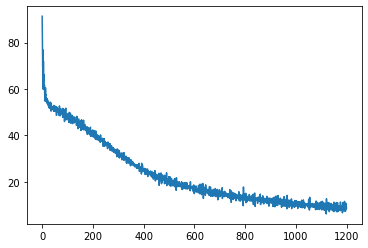

In [1]:
import random
import numpy as np

INPUT_DIM = 4
OUT_DIM = 3
H_DIM = 10

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)

from sklearn import datasets
iris = datasets.load_iris()
dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range(len(iris.target))]

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 400
BATCH_SIZE = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()